In [1]:
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

# Read the csv file using genfromtxt
dataset1 = "Data/government-recurrent-expenditure-on-education-by-type-of-educational-institutions.csv"
dataset1_extract = np.genfromtxt(dataset1, dtype = ['i4', 'U50', 'i8'], delimiter = ',', names = True)
print(dataset1_extract)

[(1981, 'Primary Schools',  241364) (1981, 'Secondary Schools',  222153)
 (1981, 'Junior Colleges / Centralised Institute',   22787)
 (1981, 'Institute of Technical Education',   38900)
 (1981, 'Polytechnics',   33623) (1981, 'Universities',  108527)
 (1981, 'Others',   45378) (1982, 'Primary Schools',  337339)
 (1982, 'Secondary Schools',  291171)
 (1982, 'Junior Colleges / Centralised Institute',   31992)
 (1982, 'Institute of Technical Education',   47401)
 (1982, 'Polytechnics',   54876) (1982, 'Universities',  156435)
 (1982, 'Others',   64537) (1983, 'Primary Schools',  357249)
 (1983, 'Secondary Schools',  312184)
 (1983, 'Junior Colleges / Centralised Institute',   36016)
 (1983, 'Institute of Technical Education',   55121)
 (1983, 'Polytechnics',   75018) (1983, 'Universities',  197947)
 (1983, 'Others',   73578) (1984, 'Primary Schools',  403915)
 (1984, 'Secondary Schools',  347896)
 (1984, 'Junior Colleges / Centralised Institute',   44491)
 (1984, 'Institute of Technical E

In [2]:
# Text-Based Analysis
print("**Singapore's Government Recurrent Expenditure on Education by type of Educational Institutions**")
years = dataset1_extract['year']
type_of_educational_institutions = dataset1_extract['type_of_educational_institutions']
recurrent_expenditure = dataset1_extract['recurrent_expenditure']
columnHeaders = dataset1_extract.dtype.names

print(f"\nThere are {len(dataset1_extract)} rows and {len(dataset1_extract[1])} columns in the data file {dataset1}")
print(f"\nThere are {years.size} years of data, from {years[0]} to {years[-1]}\n")

# Checking numeric and non-numeric fields
print("The names of the columns are:")
for i in range(len(columnHeaders)):
    print(f"- {columnHeaders[i]} {type(dataset1_extract[0][i])} isNumeric: {str(dataset1_extract[0][i]).isnumeric()}")
    
print(f"\n{len(np.unique(years))} unique values in years column\n{len(np.unique(type_of_educational_institutions))} unique values in type_of_educational_institutions column\n{len(np.unique(recurrent_expenditure))} unique values in recurrent_expenditure column")

**Singapore's Government Recurrent Expenditure on Education by type of Educational Institutions**

There are 273 rows and 3 columns in the data file Data/government-recurrent-expenditure-on-education-by-type-of-educational-institutions.csv

There are 273 years of data, from 1981 to 2019

The names of the columns are:
- year <class 'numpy.int32'> isNumeric: True
- type_of_educational_institutions <class 'numpy.str_'> isNumeric: False
- recurrent_expenditure <class 'numpy.int64'> isNumeric: True

39 unique values in years column
7 unique values in type_of_educational_institutions column
273 unique values in recurrent_expenditure column


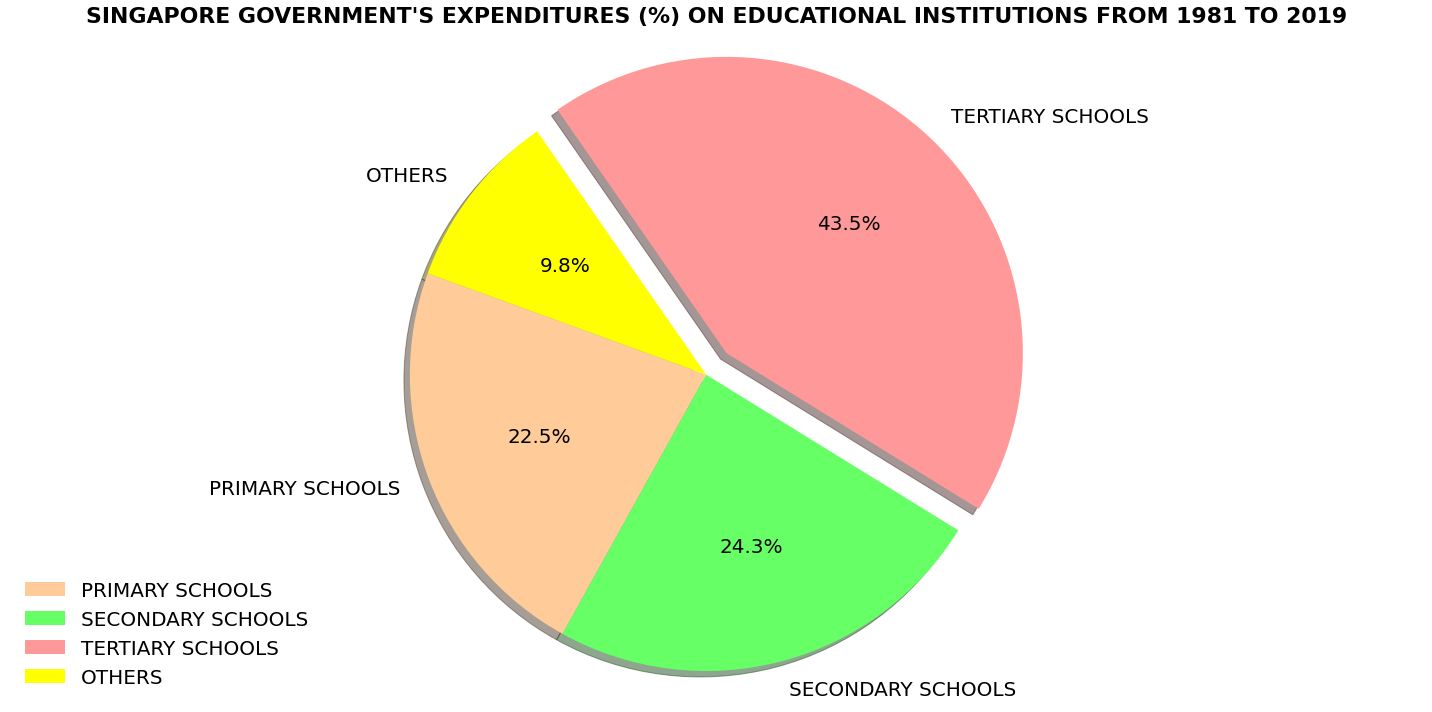

In [3]:
# Graph 1: Pie Chart - Comparing the expenditures the Singapore government spends for each institution

# Extracting the rows for each of the respective educational institutions
data_primary = dataset1_extract[dataset1_extract['type_of_educational_institutions']=='Primary Schools']
data_secondary = dataset1_extract[dataset1_extract['type_of_educational_institutions']=='Secondary Schools']
data_jc = dataset1_extract[dataset1_extract['type_of_educational_institutions']=='Junior Colleges / Centralised Institute']
data_poly = dataset1_extract[dataset1_extract['type_of_educational_institutions']=='Polytechnics']
data_ite = dataset1_extract[dataset1_extract['type_of_educational_institutions']=='Institute of Technical Education']
data_uni = dataset1_extract[dataset1_extract['type_of_educational_institutions']=='Universities']
data_others = dataset1_extract[dataset1_extract['type_of_educational_institutions']=='Others']

# Calculate the sum of all the expenditures for the respective institutions from 1981 to 2019
primaryExp = (data_primary['recurrent_expenditure']).sum()
secondaryExp = (data_secondary['recurrent_expenditure']).sum()
jcExp = (data_jc['recurrent_expenditure']).sum()
polyExp = (data_poly['recurrent_expenditure']).sum()
iteExp = (data_ite['recurrent_expenditure']).sum()
uniExp = (data_uni['recurrent_expenditure']).sum()
othersExp = (data_others['recurrent_expenditure']).sum()
tertiaryExp = jcExp + polyExp + iteExp + uniExp # Declaring a new variable (tertiaryExp) for all tertiary schools

# Append the sums into individual elements into an array
values = [primaryExp, secondaryExp, tertiaryExp, othersExp]

# Define the colors to represent the proportions in the pie chart
colors = ['#FFCC99', '#66FF66','#FF9999', '#FFFF00']
# Make certain parts of the pie chart stand out
explode = [0,0,0.1,0]
# Modify the size of the pie chart (width and height)
plt.figure(figsize=(20,10))

# Define the conditions for the pie chart
plt.pie(values, labels = ['PRIMARY SCHOOLS', 'SECONDARY SCHOOLS', 'TERTIARY SCHOOLS', 'OTHERS'], 
colors = colors, autopct='%1.1f%%', shadow = True, textprops = {'fontsize': 20}, explode = explode, startangle=160)

# Set the title, axis, legend and layout of the pie chart
plt.title("SINGAPORE GOVERNMENT'S EXPENDITURES (%) ON EDUCATIONAL INSTITUTIONS FROM 1981 TO 2019", fontsize = 22, 
          fontweight="bold")
plt.axis('equal')
plt.tight_layout()
plt.legend(fontsize=20, frameon = False, loc = "lower left")
plt.rcParams['font.family'] = ['century gothic']

plt.show()

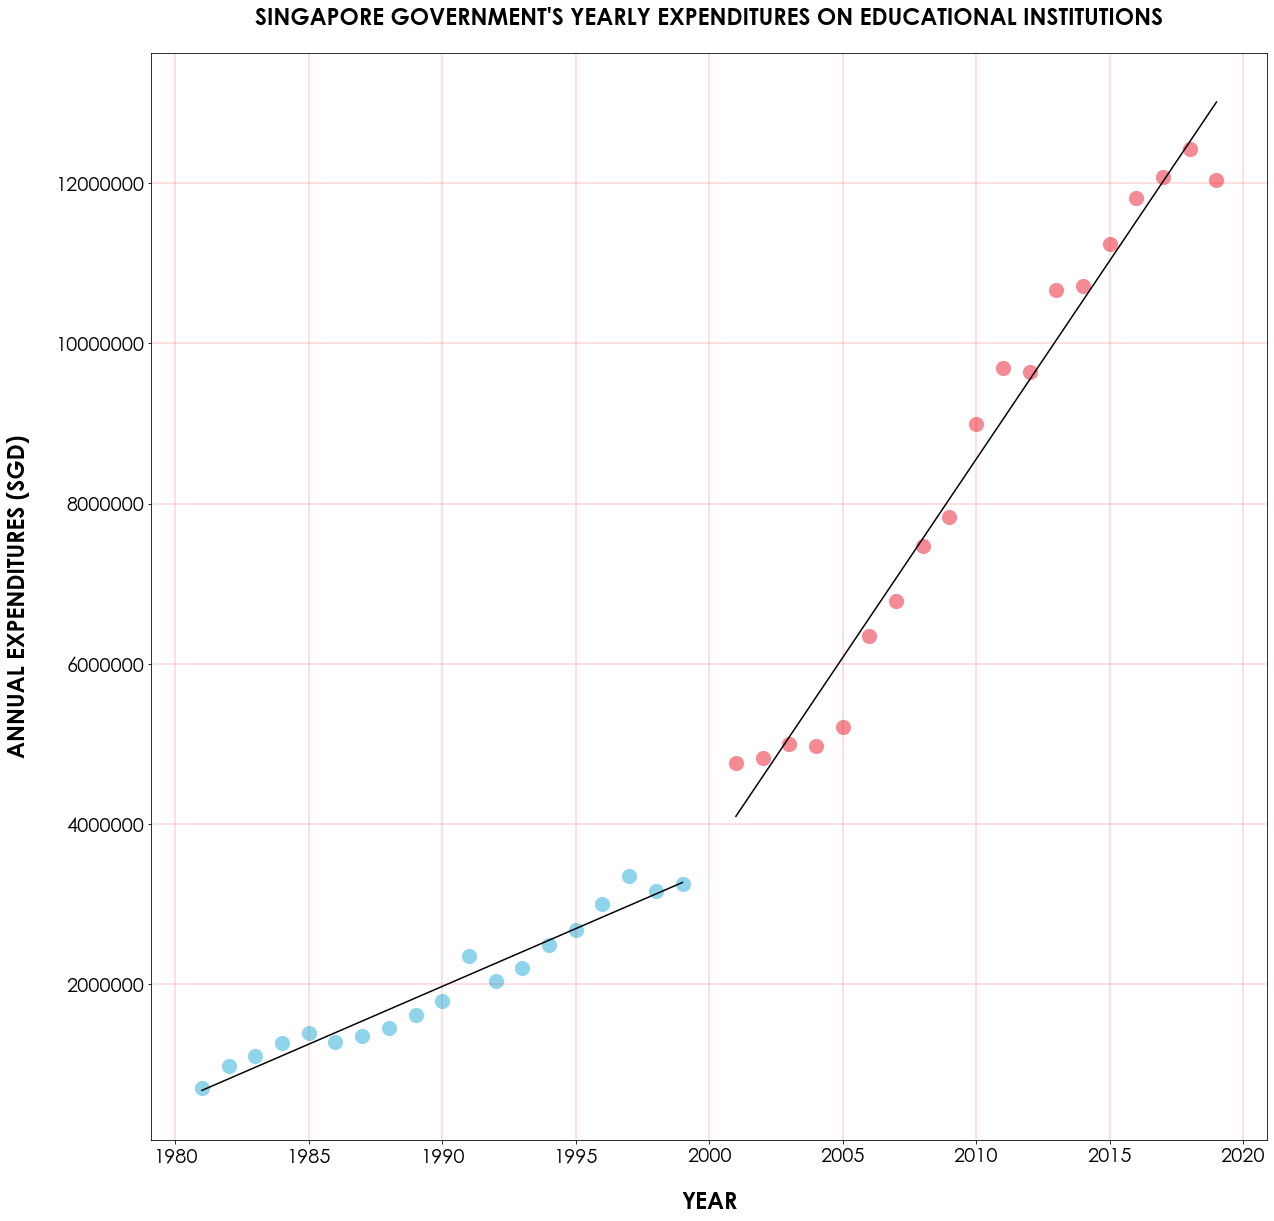

In [4]:
# Graph 2: Scatter Plot - Determining whether educational expenditures increase/decrease as years become more recent (2015-2019)

# Education Expenditures before 2000
date_before2000 = dataset1_extract[np.isin(dataset1_extract['year'], 
[1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999])]
expenditurebefore2000 = date_before2000['recurrent_expenditure']
expBefore2000 = []
for i in expenditurebefore2000:
    if i > 0:
        expBefore2000.append(i)  
# Split the array into sum values for each year respectively
expBefore2000Array = np.split(np.array(expBefore2000),19)
expSumBefore2000 = []
for j in range(0, len(expBefore2000Array)):
    expSumBefore2000.append(expBefore2000Array[j].sum())
    
# Education Expenditures after 2000
date_after2000 = dataset1_extract[np.isin(dataset1_extract['year'],
[2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])]
expenditureafter2000 = date_after2000['recurrent_expenditure']
expAfter2000 = []
for i in expenditureafter2000:
    if i > 0:
        expAfter2000.append(i)
# Split the array into sum values for each year respectively
expAfter2000Array = np.split(np.array(expAfter2000),19)
expSumAfter2000 = []
for j in range(0, len(expAfter2000Array)):
    expSumAfter2000.append(expAfter2000Array[j].sum())

# Total Education Expenditures from 1981 to 2019
dates = dataset1_extract[np.isin(dataset1_extract['year'], [1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999, 2000, 2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019])]
totalExpenditure = dates['recurrent_expenditure']
expTotal = []
for i in totalExpenditure:
    if i > 0:
        expTotal.append(i)

# Split the array into sum values for each year respectively
expTotalArray = np.split(np.array(expTotal),39)
expSum = []
for j in range(0, len(expTotalArray)):
    expSum.append(expTotalArray[j].sum())

# Defining the year parameters for 1981 to year 1999 and after the year 2000

year = np.unique(dataset1_extract['year'])

yearBefore2000 = []
for i in range(0, len(expSumBefore2000)):
    yearBefore2000.append(year[i])
    
yearAfter2000 = [] 
for i in range(20, len(expSum)):
    yearAfter2000.append(year[i])

# Plotting the Scatter Plot
plt.title("SINGAPORE GOVERNMENT'S YEARLY EXPENDITURES ON EDUCATIONAL INSTITUTIONS", y = 1.02, fontsize=23, fontweight='bold')

plt.scatter(yearBefore2000, expSumBefore2000, s = 200, c = "#8ED5EC")
m,b = np.polyfit(yearBefore2000, expSumBefore2000, deg = 1)
plt.plot(yearBefore2000, m*np.array(yearBefore2000)+b, 'black')

plt.scatter(yearAfter2000, expSumAfter2000, s = 200, c = "#F48B94")
m,b = np.polyfit(yearAfter2000, expSumAfter2000, deg = 1)
plt.plot(yearAfter2000, m*np.array(yearAfter2000)+b, 'black')

# Formatting the x and y axes and labels of the scatter plot
plt.xlabel('YEAR',fontsize=23, labelpad=25, fontweight='bold')
plt.xticks(fontsize=20)
plt.ylabel('ANNUAL EXPENDITURES (SGD)',fontsize=23, labelpad=25, fontweight='bold')
plt.yticks(fontsize=20)

# Additional Formatting for size and grids of the scatter plot
plt.ticklabel_format(style='plain', axis='y')
plt.gcf().set_size_inches((20,20))
plt.grid(color='red', linestyle='-', linewidth=0.25)
plt.rcParams['font.family'] = ['century gothic']
plt.show()